AMATH 584 Homework 3  
Kelton Busby

# Problem 1

In [188]:
import numpy as np
import os
import scipy.linalg as spl
from matplotlib import pyplot as plt
import pandas as pd

## Download datasets:

In [141]:
# Iterate through the original images folder finding all files
filelist=[]
for root, dirs, files in os.walk('C://Users//Kelton//UW//AMATH584//Homework//hw2/yalefaces/'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

# Build a list of images from the files
images=[]
for imgfile in filelist:
    images.append(plt.imread(imgfile))

number of images: 165


In [142]:
# Iterate through the cropped images folder finding all files
filelist=[]
for root, dirs, files in os.walk('C:\\Users\\Kelton\\UW\\AMATH584\\Homework\\hw2\\yalefaces_cropped'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

# Build a list of images from the files
cropped_images=[]
for imgfile in filelist:
    cropped_images.append(plt.imread(imgfile))

number of images: 272


## Modified Gram-Schmidt Orthogonalization Procedure

In [206]:
def modGramSchmidt(A):
    
    m,n = np.shape(A)
    Q = np.zeros([m,m])
    R = np.zeros([m,n])
    V = A.copy()
    
    
    '''Returns an orthogonalization of input matrix A using modified Gram-Schmidt algorithm.'''
    
    for i in np.arange(0,n):
        
        R[i,i] = np.linalg.norm(V[:,i], ord=2)
        Q[:,i]=V[:,i] / R[i,i]
        
        for j in np.arange(i+1,n):

            R[i,j] = np.dot(np.conj(np.transpose(Q))[:,i],V[:,j])
            V[:,j] = V[:,j] - np.dot(R[i,j],Q[:,i])            
        
    return Q,R
    

Creating a well conditioned matrix:

In [207]:
A = np.random.randn(25,20)

In [208]:
A.tofile('A.csv',sep=',')

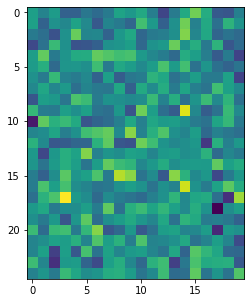

In [209]:
plt.figure(figsize=[5,5])
plt.imshow(A)

Checking the condition number:

In [210]:
np.round(np.linalg.cond(A),2)

18.9

Comparing the modified Gram Schmidt to scipy implementation of QR orthogonalization: 

In [211]:
q,r = modGramSchmidt(A)

In [212]:
# comparing with scipy QR
Q, R = spl.qr(A, mode='full')

Capital Q,R is scipy implementation.  
Lower q,r is my implementation. 

In [213]:
Q[0]

array([-0.08301367, -0.05846263,  0.08192336, -0.24046933,  0.25798853,
        0.13087204, -0.13301475, -0.1548646 ,  0.31008778,  0.19531075,
       -0.20601591,  0.11615027,  0.28352076, -0.20777097,  0.14852445,
       -0.4944836 ,  0.31883401, -0.06544089,  0.20994889, -0.14711101,
       -0.15468039, -0.01497177, -0.02970752,  0.00351109, -0.15076144])

In [214]:
q[0]

array([ 0.08301367, -0.08099055,  0.05417645, -0.24635557, -0.26454659,
       -0.1352867 , -0.16375395, -0.12374382,  0.11043406,  0.03227207,
        0.1535964 , -0.16851492, -0.40910695, -0.23341929,  0.08551288,
        0.44590302, -0.09681494, -0.12610182, -0.37475814, -0.05970191,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [215]:
np.diag(R)

array([-4.82977858,  4.52548469,  4.78947907,  5.16125039, -4.11505287,
       -4.62960782,  5.28758949,  4.53628225,  3.98754118,  3.46978183,
       -3.40547307, -2.21994822, -3.51658284,  2.66773505, -3.81766835,
       -1.82812988,  1.95387753,  3.3931844 , -3.09548129, -2.66993789])

In [216]:
np.diag(r)

array([4.82977858, 4.75176127, 5.20245529, 5.36199236, 4.18495192,
       4.96312434, 6.07714817, 5.14361699, 4.55232853, 4.96081099,
       4.39911622, 3.22974976, 4.69056003, 4.32033162, 6.03378684,
       4.19195758, 4.0925029 , 7.22768385, 5.14615567, 5.76726339])

Bringing in the matlab:

Capital Q,Rmat is matlab implementation.  
Lower q,rmat is qrfactor implementation. 

In [217]:
Qmat = np.array(pd.read_csv('Qmat.txt', header=None))
Rmat = np.array(pd.read_csv('Rmat.txt', header=None))
qmat = np.array(pd.read_csv('qfactor.txt', header=None))
rmat = np.array(pd.read_csv('rfactor.txt', header=None))

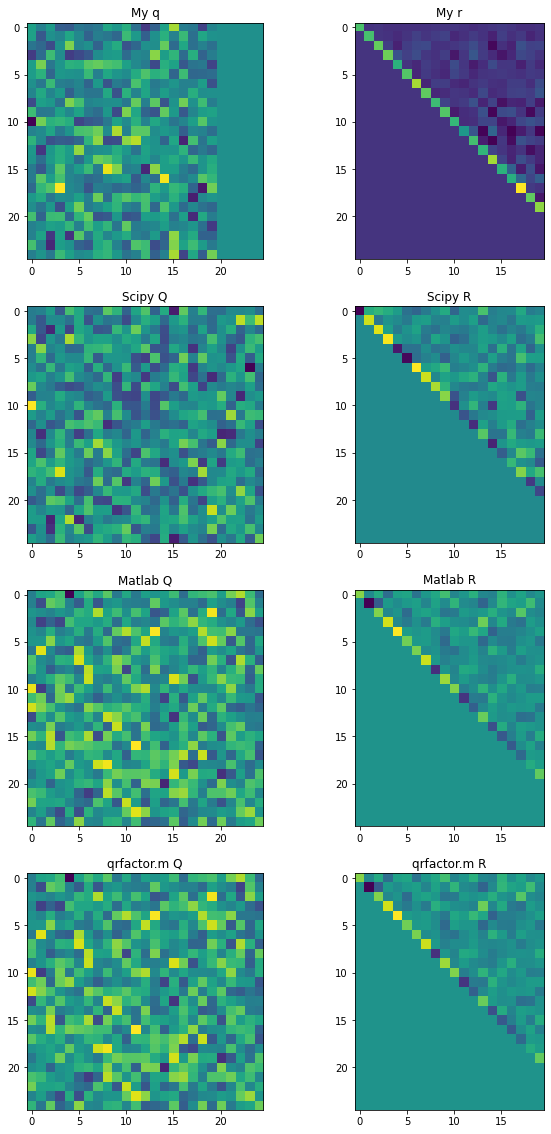

In [218]:
plt.figure(figsize=[10,20])
plt.subplot(4,2,1)
plt.title('My q')
plt.imshow(q)
plt.subplot(4,2,2)
plt.title('My r')
plt.imshow(r)
plt.subplot(4,2,3)
plt.title('Scipy Q')
plt.imshow(Q)
plt.subplot(4,2,4)
plt.title('Scipy R')
plt.imshow(R)
plt.subplot(4,2,5)
plt.title('Matlab Q')
plt.imshow(Qmat)
plt.subplot(4,2,6)
plt.title('Matlab R')
plt.imshow(Rmat)
plt.subplot(4,2,7)
plt.title('qrfactor.m Q')
plt.imshow(qmat)
plt.subplot(4,2,8)
plt.title('qrfactor.m R')
plt.imshow(rmat)

Creating a matrix with poor conditioning:

In [181]:
from sklearn.datasets import make_classification
A = make_classification(n_redundant=3, n_samples=25, n_features=20)[0]

In [182]:
np.linalg.cond(A)

3.939033234916002e+16

In [183]:
modGramSchmidt(A)

(array([[-1.03861742e-01, -1.25671878e-01, -8.64404726e-02,
         -1.01159619e-01, -7.99879578e-02, -7.51280302e-02,
         -1.21759420e-01,  1.39177622e-01,  8.22819569e-02,
         -1.29324113e-01,  3.45042445e-01,  8.41964091e-02,
          3.71101849e-01, -2.87995427e-01, -1.99294126e-02,
          1.78544037e-01,  2.52379033e-02,  1.24170663e-01,
         -4.54926133e-02, -6.59643820e-02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-5.36042496e-02,  1.32434514e-01,  3.93366253e-01,
         -1.12035684e-01,  8.04126937e-02,  3.49888611e-03,
          3.43461537e-01,  1.49144204e-01,  5.37071740e-01,
          1.36157504e-01,  8.98706775e-02, -4.23933873e-01,
          1.57368113e-01,  8.33226693e-02,  6.79395503e-02,
          4.19182741e-01, -2.93547452e-01, -4.68159300e-01,
         -2.75887655e-01, -8.43735242e-02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.0

In [184]:
spl.qr(A)

(array([[-1.03861742e-01,  1.19714733e-01, -1.05333062e-01,
         -1.48378618e-01,  8.17797679e-02,  2.48167122e-02,
         -6.01066718e-02,  1.72740073e-01, -5.68980419e-02,
          1.76679851e-01,  4.98217877e-01, -3.19505410e-01,
         -2.04724882e-01,  3.13199084e-01, -4.45968438e-02,
         -2.94479133e-01,  2.53512932e-01,  1.73948946e-01,
          6.44227263e-03, -1.22871279e-01,  3.08991305e-01,
         -2.49699712e-01,  1.37830886e-01, -3.24361990e-02,
          1.57500908e-03],
        [-5.36042496e-02, -1.35857950e-01,  4.78682762e-01,
         -3.24804089e-02,  5.44284572e-02,  9.63190355e-02,
          6.23525233e-02,  3.77422308e-01, -4.24670548e-01,
         -1.23211592e-01,  7.45128976e-03, -1.98855282e-01,
         -1.28388068e-01, -3.44699254e-01,  1.25539314e-01,
         -1.17763206e-01, -1.19372314e-02, -3.44831943e-04,
         -5.08697583e-02,  2.24663427e-01, -5.43327612e-03,
          1.55266683e-02,  5.41384448e-02,  1.54137387e-02,
          3.6

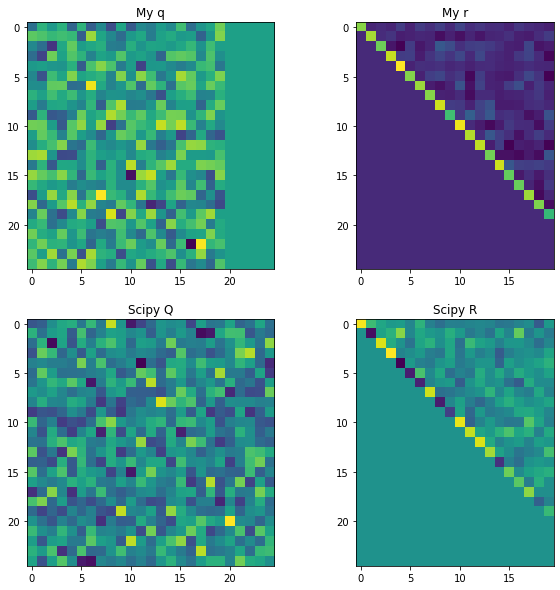

In [185]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.title('My q')
plt.imshow(q)
plt.subplot(2,2,2)
plt.title('My r')
plt.imshow(r)
plt.subplot(2,2,3)
plt.title('Scipy Q')
plt.imshow(Q)
plt.subplot(2,2,4)
plt.title('Scipy R')
plt.imshow(R)

# Problem 2

In [226]:
def f(x):
    return (x-2)**9

def f2(x):
    return x**9-18*x**8+144*x**7-672*x**6+2016*x**5-4032*x**4+5376*x**3-4608*x**2+2304*x-512

In [223]:
dx=.001
x = np.arange(1.92,2.08+dx,dx)

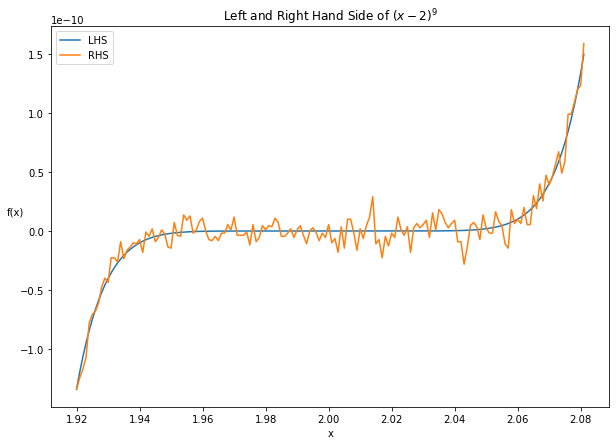

In [238]:
plt.figure(figsize=[10,7])
plt.plot(x,f(x), label='LHS')
plt.plot(x,f2(x), label='RHS')
plt.xlabel('x'); plt.ylabel('f(x)', rotation=0)
plt.title('Left and Right Hand Side of $(x-2)^9$');
plt.legend();

# Problem 3